# Dev notebook - AS


## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
process = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

## Set up variables

### Aviation scenario

In [3]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [4.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [4.0]

In [4]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=20.0,
    cruise_altitude=12000.0,
    ask_year=406000000,
    rc_cost=60000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-5.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=80000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2022,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2029,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-30.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 2", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2024,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=+50.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 3", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [8]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [3, 10, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [5, 10, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [30, 20, 0, 0]

In [9]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    5,
    250,
    500,
    775,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

In [12]:
process.compute()

## Results

In [13]:
# process.fleet_model.plot()

In [14]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:old_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:recent_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_ask',
#                         ]].plot(stacked=True, kind='area')

In [15]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_in_fleet',]].plot(stacked=True, kind='area')

In [16]:
# process.fleet_model.df.loc[2000:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_non_recurring_costs',]].plot(stacked=True, kind='area')

In [29]:
import matplotlib.pyplot as plt
import pandas as pd


def update_plot(year):
    
    plt.clf()
    fig, ax= plt.subplots()

    name=[]
    vol=[]
    cost=[]
    colors=[]
    for category, sets in process.fleet_model.all_aircraft_elements.items():
            for aircraft_var in sets:
                if hasattr(aircraft_var, "parameters"):
                    aircraft_var_name = aircraft_var.parameters.full_name
                else:
                    aircraft_var_name = aircraft_var.full_name

                vol.append(process.fleet_model.df.loc[year, aircraft_var_name+':aircraft_carbon_abatement_volume']/1000000)
                cost.append(process.fleet_model.df.loc[year, aircraft_var_name+':aircraft_carbon_abatement_cost'])
                colors.append('gold')
                name.append(aircraft_var_name) 




    name.extend([el for el in[
        "Bio - HEFA FOG",
        "Bio - HEFA Others",
        "Bio - Alcohol to Jet",
        "Bio - FT MSW",
        "Bio - FT Others",
        "H2C",
        "H2CCCS",
        "H2G",
        "H2GCCS",
        "H2E",
        "Electrofuel",
        "OPS",
        "LF"
    ]])

    # Abatement effective in MtCO2e
    vol.extend([
        elt / 1000000
        for elt in [
            process.vector_outputs_df.abatement_effective_hefa_fog[year],
            process.vector_outputs_df.abatement_effective_hefa_others[year],
            process.vector_outputs_df.abatement_effective_atj[year],
            process.vector_outputs_df.abatement_effective_ft_msw[year],
            process.vector_outputs_df.abatement_effective_ft_others[year],
            process.vector_outputs_df.abatement_effective_hydrogen_coal[year],
            process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs[year],
            process.vector_outputs_df.abatement_effective_hydrogen_gas[year],
            process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs[year],
            process.vector_outputs_df.abatement_effective_hydrogen_electrolysis[year],
            process.vector_outputs_df.abatement_effective_electrofuel[year],
            process.vector_outputs_df.operations_abatement_effective[year],
            process.vector_outputs_df.load_factor_abatement_effective[year],
        ]
    ])

    # carbon abatement cost in (€/tCO2e)
    cost.extend([el for el in [
        process.vector_outputs_df.carbon_abatement_cost_hefa_fog[year],
        process.vector_outputs_df.carbon_abatement_cost_hefa_others[year],
        process.vector_outputs_df.carbon_abatement_cost_atj[year],
        process.vector_outputs_df.carbon_abatement_cost_ft_msw[year],
        process.vector_outputs_df.carbon_abatement_cost_ft_others[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_coal[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_coal_ccs[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_gas[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_gas_ccs[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_electrolysis[year],
        process.vector_outputs_df.carbon_abatement_cost_electrofuel[year],
        process.vector_outputs_df.operations_abatement_cost[year],
        process.vector_outputs_df.load_factor_abatement_cost[year]
    ]
                ])



    colors.extend([el for el in[
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "orange", 
        "orange"
    ]])


    macc_df = pd.DataFrame(
        data=[vol, cost, colors],
        columns=name,
        index=["abatement_effective", "carbon_abatement_cost", "colors"],
    )

    macc_df = macc_df.transpose().sort_values(by="carbon_abatement_cost")

    macc_df = macc_df[macc_df["abatement_effective"] > 0]

    heights = macc_df["carbon_abatement_cost"].to_list()
    names = macc_df.index.to_list()
    heights.insert(0, 0)
    heights.append(heights[-1])

    # # MAx effective MACC
    widths_effective = macc_df["abatement_effective"].to_list()
    widths_effective.insert(0, 0)
    widths_effective.append(widths_effective[-1])

    colors = macc_df["colors"].to_list()

    macc_curve = ax.step(
        np.cumsum(widths_effective) - widths_effective,
        heights,
        where="post",
        color="#335C67",
        label="Marginal abatement cost",
        linewidth=1,
    )


    for i in range(len(widths_effective) - 2):
        x_position = np.cumsum(widths_effective)[i]
        y_position = max(0, heights[i + 1]) + 20

        # Adjust the x_position to avoid superposition
        if i > 0 and x_position - 10 < np.cumsum(widths_effective)[i-1]:
            x_position = x_position + 10

        ax.text(x_position, y_position, names[i], rotation=90, size=8)


    # Fill under the step plot with different colors for each step
    for i in range(0, (len(widths_effective) - 2)):
        # Create a polygon for each step
        polygon = plt.Polygon(
            [
                (np.cumsum(widths_effective)[i], 0),
                (np.cumsum(widths_effective)[i], heights[i + 1]),
                (np.cumsum(widths_effective)[i + 1], heights[i + 1]),
                (np.cumsum(widths_effective)[i + 1], 0),
            ],
            closed=True,
            alpha=1,
            facecolor=colors[i],
            edgecolor='#335C67',
            linewidth=1,
            linestyle='--'
        )
        ax.add_patch(polygon)


    ax.set_ylabel("Carbon Abatement Cost (€/t$\mathregular{CO_2}$)")
    ax.set_xlabel("$\mathregular{CO_2}$ abatted (Mt)")

    # for i in range(len(widths_effective) - 1):
    #     ax.text(np.cumsum(widths_effective)[i] + 10, heights[i + 1] - 50, name[i])

    ax.legend(
        fancybox=True,
        shadow=True,
        loc="upper left",
        prop={"size": 8},
    )
    plt.show()
    return macc_df


In [30]:
from ipywidgets import interact

# Use interactive to create the slider widget
a=interact(update_plot, year=(2020, 2050, 1))


interactive(children=(IntSlider(value=2035, description='year', max=2050, min=2020), Output()), _dom_classes=(…

In [47]:
vol=pd.DataFrame()
for category, sets in process.fleet_model.all_aircraft_elements.items():
            for aircraft_var in sets:
                if hasattr(aircraft_var, "parameters"):
                    aircraft_var_name = aircraft_var.parameters.full_name
                else:
                    aircraft_var_name = aircraft_var.full_name

                vol=pd.concat([vol,process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_carbon_abatement_volume']/1000000], axis=1)
                
vol.sum(axis=1)

2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005      0.000000
2006      0.000000
2007      0.000000
2008      0.000000
2009      0.000000
2010      0.000000
2011      0.000000
2012      0.000000
2013      0.000000
2014      0.000000
2015      0.000000
2016      0.000000
2017      0.000000
2018      0.000000
2019     61.715997
2020     32.261494
2021     44.703027
2022     69.525165
2023     98.478666
2024    131.341578
2025    149.317530
2026    167.021603
2027    184.316100
2028    201.232608
2029    217.938041
2030    234.682196
2031    251.738219
2032    269.344024
2033    287.652570
2034    306.701380
2035    326.341901
2036    346.521049
2037    366.990463
2038    387.573688
2039    408.154877
2040    428.692005
2041    449.209217
2042    469.778393
2043    490.499450
2044    511.485002
2045    532.851071
2046    554.712929
2047    577.183917
2048    600.374997
2049    624.393628
2050    649.341783
1966      0.000000
1967      0.

In [57]:
((process.vector_outputs_df["co2_emissions_2019technology"]*1000000-process.vector_outputs_df[
"co2_emissions_including_aircraft_efficiency"
# "co2_emissions_including_operations"
# "co2_emissions_including_load_factor"
# "co2_emissions_including_energy"
]*1000000) - vol.sum(axis=1)*1000000)


1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019   -6.171600e+07
2020   -1.316429e+08
2021   -1.000132e+07
2022   -1.070990e+07
2023   -1.021041e+07
2024   -8.651958e+06
2025   -5.566007e+06
2026   -2.578549e+06
2027    2.633919e+05
2028    2.943670e+06
2029    5.471448e+06
2030    7.873323e+06
2031    1.018508e+07
2032    1.244414e+07
2033    1.468320e+07
2034    1.692567e+07
2035    1.917932e+07
2036    2.145205e+07
2037    2.373452e+07
2038    2.601689e+07
2039    2.828964e+07
2040    3.054580e+07
2041    3.278154e+07
2042    3.499

In [20]:
process.vector_outputs_df.operations_abatement_effective 

2000    0.000000e+00
2001    0.000000e+00
2002    0.000000e+00
2003    0.000000e+00
2004    0.000000e+00
2005    0.000000e+00
2006    0.000000e+00
2007    0.000000e+00
2008    0.000000e+00
2009    0.000000e+00
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2016    0.000000e+00
2017    0.000000e+00
2018    0.000000e+00
2019    0.000000e+00
2020    0.000000e+00
2021    0.000000e+00
2022    0.000000e+00
2023    0.000000e+00
2024    0.000000e+00
2025    1.364701e+06
2026    1.891245e+06
2027    2.619248e+06
2028    3.621635e+06
2029    4.992555e+06
2030    6.849316e+06
2031    9.331165e+06
2032    1.259245e+07
2033    1.678753e+07
2034    2.204600e+07
2035    2.844194e+07
2036    3.595471e+07
2037    4.445610e+07
2038    5.371029e+07
2039    6.341012e+07
2040    7.323374e+07
2041    8.290206e+07
2042    9.221763e+07
2043    1.010763e+08
2044    1.094565e+08
2045    1.173961e+08
2046    1.249682e+08
2047    1.322

In [21]:
process.vector_outputs_df.energy_per_ask_mean.loc[2020 - 1]/process.vector_outputs_df.energy_per_ask_mean_without_operations.loc[2020 - 1]

1.0

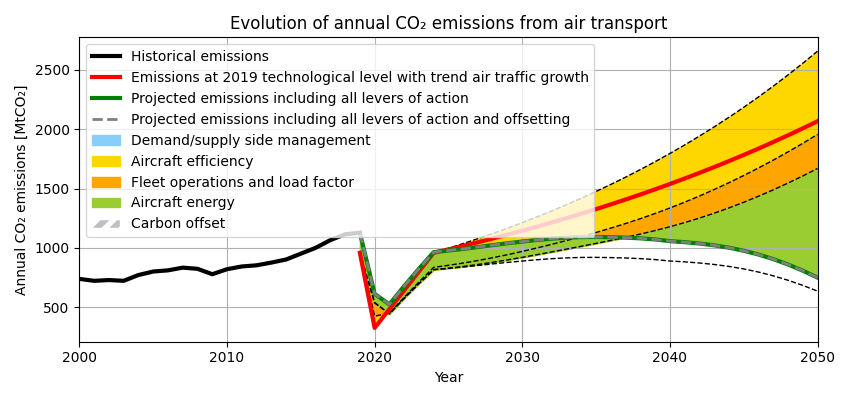

In [22]:
process.plot("air_transport_co2_emissions", save=False)